In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import requests
import json
import requests
import time
from datetime import datetime
from IPython.display import display, clear_output
import numpy as np

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
1000/10000

0.1

In [4]:
target_diff = 0.003
stop_loss = 0.003
units = 5000
profit = (target_diff / 0.0001)*(units/10000)
loss = (stop_loss / 0.0001)*(units/10000)
version = '10'

In [5]:
profit

15.0

In [6]:
filename_date = '100919'

layout = pd.read_csv('../data/' + filename_date + 'mds_out_layout.csv')
layout = layout['features'].values
data = pd.read_csv('../data/' + filename_date + 'mds_out.csv', usecols=layout)
data.shape

(16415, 785)

In [7]:
data['time'].min()

'2017-01-19 21:00:00'

In [8]:
data['time'].max()

'2019-09-24 19:00:00'

In [9]:
num_cols = ['ask_c', 'bid_c']

In [10]:
data['time'] = pd.to_datetime(data['time'])
data = data.sort_values(by='time')
data = data.drop_duplicates(subset=['time'])
data = data.reset_index(drop=True)
data['index'] = data.index
for n in num_cols:
    data[n] = pd.to_numeric(data[n])
data['target_tp'] = data['ask_c'] + target_diff
data['target_sl'] = data['bid_c'] - stop_loss
data = data[~data['target_tp'].isnull()]

In [11]:
data['diff'] = data['target_tp'] - data['target_sl']
data['diff'].describe()

count    16415.000000
mean         0.006155
std          0.000097
min          0.006090
25%          0.006120
50%          0.006130
75%          0.006140
max          0.007500
Name: diff, dtype: float64

In [12]:
# data[['index', 'time', 'volume', 'bid_o', 'bid_h','bid_l','bid_c', 'ask_o', 'ask_h','ask_l','ask_c', 'ask_prev_c', 'bid_prev_c', 'target_tp', 'target_sl', 'g', 'l', 'l_time']].head(40)

In [13]:
data['g']=np.NaN
data['l']=np.NaN
deep=len(data.index)
irange = data['index'].values
tp_good = False
sl_good = False

for i in irange:

#     while tp_good == False and sl_good == False:
    show = (i / len(irange))*100
    show = str(round(show, 2))
    show = show + ' - ' + str(datetime.now())
    display(show)
    tp_good = False
    sl_good = False
#     print(i)

    for r in irange:
#             print(i, r, tp_good, sl_good)
        if r > i:
            if tp_good == False and sl_good == False:
                if  data[data['index'] == r]['ask_h'].values[0] >= data[data['index'] == i]['target_tp'].values[0] and not tp_good:
                    data.at[i, 'g'] = data[data['index'] == r]['index'].values[0]
                    data.at[i, 'g_time'] = data[data['index'] == r]['time'].values[0]
                    tp_good = True
                else:
                    data.at[i, 'g'] = None
                    data.at[i, 'g_time'] =None

                if  data[data['index'] == r]['bid_l'].values[0] <= data[data['index'] == i]['target_sl'].values[0] and not sl_good:
                    data.at[i, 'l'] = data[data['index'] == r]['index'].values[0]
                    data.at[i, 'l_time'] = data[data['index'] == r]['time'].values[0]
                    sl_good = True
                else:  
                    data.at[i, 'l'] = None     
                    data.at[i, 'l_time'] = None  
            else:
                break

    clear_output()    

#     print(datetime.now())

In [14]:
# START WITH FIRST TARGET INDEX BEC TIME ISSUE

# if tp_good:
#     target_index = data['g'].max()
#     good_data = data[~data['g'].isnull()].copy()

# if sl_good:
#     target_index = data['l'].max()
#     good_data = data[~data['g'].isnull()].copy()

# tp_good = False
# sl_good = False
# done = False

# counter = 1
# while not done:
#     show = (target_index / len(irange))*100
#     show = str(round(show, 2))
#     show = show + ' - ' + str(datetime.now())
#     display(show)
#     tp_good = False
#     sl_good = False

#     for r in irange:
#         if r > target_index:
#             if tp_good == False and sl_good == False:
#                 if  data[data['index'] == r]['ask_h'].values[0] >= data[data['index'] == target_index]['target_tp'].values[0] and not tp_good:
#                     data.at[target_index, 'g'] = data[data['index'] == r]['index'].values[0]
#                     data.at[target_index, 'g_time'] = data[data['index'] == r]['time'].values[0]
#                     tp_good = True
#                 else:
#                     data.at[target_index, 'g'] = None
#                     data.at[target_index, 'g_time'] =None


#                 if  data[data['index'] == r]['bid_l'].values[0] <= data[data['index'] == target_index]['target_sl'].values[0] and not sl_good:
#                     data.at[target_index, 'l'] = data[data['index'] == r]['index'].values[0]
#                     data.at[target_index, 'l_time'] = data[data['index'] == r]['time'].values[0]
#                     sl_good = True

#                 else:  
#                     data.at[i, 'l'] = None     
#                     data.at[i, 'l_time'] = None  
#             else:
#                 break
    
#     if tp_good == True:
#         target_index = data['g'].max()
#         try:
#             temp = data[data['g'] == target_index].copy()
#             temp2 = data[data['index'] == target_index].copy()

#             if counter == 1:
#                 good_data = temp
#                 counter += 1
#             else:
#                 good_data = good_data.append(temp)

#             if target_index == data['index'].max():
#                 done = True
#         except IndexError:
#             done = True

#     elif sl_good == True:
#         target_index = data['l'].max()
#         try:
#             temp = data[data['l'] == target_index].copy()
#             temp2 = data[data['index'] == target_index].copy()

#             if counter == 1:
#                 good_data = temp
#                 counter += 1
#             else:
#                 good_data = good_data.append(temp)

#             if target_index == data['index'].max():
#                 done = True
#         except IndexError:
#             done = True
            
#     else:
#         done = True


#     clear_output()    

In [15]:
good_mask = (data['g'].isnull()) & (data['l'].isnull())
good_data = data[~good_mask].copy()
good_data.shape

(16398, 793)

In [16]:
good_data[['time', 'volume', 'bid_o', 'bid_h','bid_l','bid_c', 'ask_o', 'ask_h','ask_l','ask_c', 'target_tp', 'target_sl', 'g', 'l', 'l_time']].head(10)

,time,volume,bid_o,bid_h,bid_l,bid_c,ask_o,ask_h,ask_l,ask_c,target_tp,target_sl,g,l,l_time
0,2017-01-19 21:00:00,4461,1.06583,1.06612,1.06516,1.06530,1.06600,1.06632,1.06531,1.06546,1.06846,1.06230,1.0,NaN,NaN
1,2017-01-19 22:00:00,2878,1.06528,1.06871,1.06528,1.06808,1.06545,1.06888,1.06545,1.06821,1.07121,1.06508,NaN,9.0,1.484892e+18
2,2017-01-19 23:00:00,3073,1.06807,1.06834,1.06742,1.06767,1.06825,1.06847,1.06757,1.06781,1.07081,1.06467,NaN,9.0,1.484892e+18
3,2017-01-20 00:00:00,1888,1.06765,1.06929,1.06765,1.06847,1.06780,1.06943,1.06780,1.06861,1.07161,1.06547,NaN,9.0,1.484892e+18
4,2017-01-20 01:00:00,2733,1.06846,1.06853,1.06774,1.06797,1.06860,1.06867,1.06788,1.06811,1.07111,1.06497,NaN,9.0,1.484892e+18
5,2017-01-20 02:00:00,3330,1.06796,1.06809,1.06708,1.06716,1.06809,1.06823,1.06719,1.06731,1.07031,1.06416,NaN,9.0,1.484892e+18
6,2017-01-20 03:00:00,6519,1.06716,1.06856,1.06715,1.06820,1.06730,1.06868,1.06730,1.06839,1.07139,1.06520,NaN,9.0,1.484892e+18
7,2017-01-20 04:00:00,8151,1.06819,1.06915,1.06705,1.06715,1.06836,1.06928,1.06717,1.06727,1.07027,1.06415,NaN,10.0,1.484896e+18
8,2017-01-20 05:00:00,7173,1.06713,1.06831,1.06603,1.06626,1.06727,1.06845,1.06615,1.06639,1.06939,1.06326,NaN,10.0,1.484896e+18
9,2017-01-20 06:00:00,5923,1.06627,1.06665,1.06416,1.06459,1.06638,1.06678,1.06428,1.06470,1.06770,1.06159,15.0,NaN,NaN


In [17]:
def get_target(value):
    if value > 0:
        return 1
    else:
        return 0

In [18]:
# max_date = data['time'].max()
good_data['g_time'] = pd.to_datetime(good_data['g_time'])
good_data['l_time'] = pd.to_datetime(good_data['l_time'])

good_data['g'] = pd.to_numeric(good_data['g'])
good_data['l'] = pd.to_numeric(good_data['l'])

good_data['g'] = good_data['g'].fillna(0)
good_data['l'] = good_data['l'].fillna(0)

# data['g'] = data['g'].fillna(data['index'].max())
# data['l'] = data['l'].fillna(data['index'].max())

good_data['long_target'] = good_data['g'].apply(get_target)
good_data['short_target'] = good_data['l'].apply(get_target)

print(good_data['long_target'].value_counts())
print()
print(good_data['short_target'].value_counts())

0    8394
1    8004
Name: long_target, dtype: int64

1    8488
0    7910
Name: short_target, dtype: int64


In [19]:
# good_data['g_time_shift'] = good_data['g_time'].shift(1)
# good_data['g_time_shift'] = pd.to_datetime(good_data['g_time_shift'] )
good_data['time'] = pd.to_datetime(good_data['time'] )
# good_data['g_diff'] = good_data['g_time'] - good_data['g_time_shift']
# good_data['g_diff'] = good_data['g_diff'].dt.seconds

In [20]:
# good_data['order'] = good_data.index
# t1 = good_data[good_data['g'] != 0.0].drop_duplicates(subset='g')
# t2 = good_data[good_data['l'] != 0.0].drop_duplicates(subset='l')
# good_data = pd.concat([t1, t2], axis=0)
# good_data= good_data.sort_values(by='order')
good_data['same_time'] = good_data['g_time'] == good_data['l_time']
good_data['same_time'] = good_data['same_time'].apply(lambda x: 1 if x else 0)
good_data = good_data[good_data['same_time'] == 0]
good_data.shape

(16304, 796)

In [21]:
print(good_data['long_target'].value_counts())
pos = good_data[good_data['long_target'] == 1].copy()
print(pos.shape)
neg = good_data[good_data['long_target'] == 0].copy()

pos['time_diff'] = (pos['g_time'] - pos['time']) / np.timedelta64(1, 'h')
pos_bad = pos[pos['time_diff'] > 24].copy()
pos_bad['long_target'] = 0

pos = pos[pos['time_diff'] <= 24]

pos.drop(['time_diff'], axis=1, inplace=True)
pos_bad.drop(['time_diff'], axis=1, inplace=True)

good_data = pd.concat([pos, neg, pos_bad], axis=0)
print(good_data['long_target'].value_counts())
good_data.shape

0    8394
1    7910
Name: long_target, dtype: int64
(7910, 796)
0    9892
1    6412
Name: long_target, dtype: int64


(16304, 796)

In [22]:
good_data.to_csv('../data/' + filename_date + '_mds_out_final_v' + version + '_long.csv', index=False, header=True)

In [23]:
good_data[['time', 'target_tp', 'target_sl', 'g', 'l', 'g_time', 'l_time', 'long_target', 'short_target', 'time']].head(10)

,time,target_tp,target_sl,g,l,g_time,l_time,long_target,short_target,time
0,2017-01-19 21:00:00,1.06846,1.06230,1.0,0.0,2017-01-19 22:00:00,NaT,1,0,2017-01-19 21:00:00
9,2017-01-20 06:00:00,1.06770,1.06159,15.0,0.0,2017-01-20 12:00:00,NaT,1,0,2017-01-20 06:00:00
10,2017-01-20 07:00:00,1.06678,1.06065,15.0,0.0,2017-01-20 12:00:00,NaT,1,0,2017-01-20 07:00:00
11,2017-01-20 08:00:00,1.06695,1.06082,15.0,0.0,2017-01-20 12:00:00,NaT,1,0,2017-01-20 08:00:00
12,2017-01-20 09:00:00,1.06582,1.05968,14.0,0.0,2017-01-20 11:00:00,NaT,1,0,2017-01-20 09:00:00
13,2017-01-20 10:00:00,1.06873,1.06258,17.0,0.0,2017-01-20 14:00:00,NaT,1,0,2017-01-20 10:00:00
14,2017-01-20 11:00:00,1.06857,1.06244,17.0,0.0,2017-01-20 14:00:00,NaT,1,0,2017-01-20 11:00:00
15,2017-01-20 12:00:00,1.07094,1.06483,19.0,0.0,2017-01-20 16:00:00,NaT,1,0,2017-01-20 12:00:00
16,2017-01-20 13:00:00,1.07098,1.06484,19.0,0.0,2017-01-20 16:00:00,NaT,1,0,2017-01-20 13:00:00
17,2017-01-20 14:00:00,1.07056,1.06442,19.0,0.0,2017-01-20 16:00:00,NaT,1,0,2017-01-20 14:00:00


In [24]:
shorts = good_data[good_data['long_target'] == 1].copy()
shorts['time'] = pd.to_datetime(shorts['time'])
shorts['g_time'] = pd.to_datetime(shorts['g_time'] )
shorts['time_diff'] = shorts['g_time'] - shorts['time']
shorts['time_diff'].head() 

0    01:00:00
9    06:00:00
10   05:00:00
11   04:00:00
12   02:00:00
Name: time_diff, dtype: timedelta64[ns]

In [25]:
shorts['time_diff'] = shorts['time_diff']  / np.timedelta64(1, 'h')

In [26]:
shorts['time_diff'].describe()

count    6412.000000
mean        9.128665
std         5.983558
min         1.000000
25%         4.000000
50%         8.000000
75%        13.000000
max        24.000000
Name: time_diff, dtype: float64

C:\Users\bbennett\Anaconda3\envs\ml\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


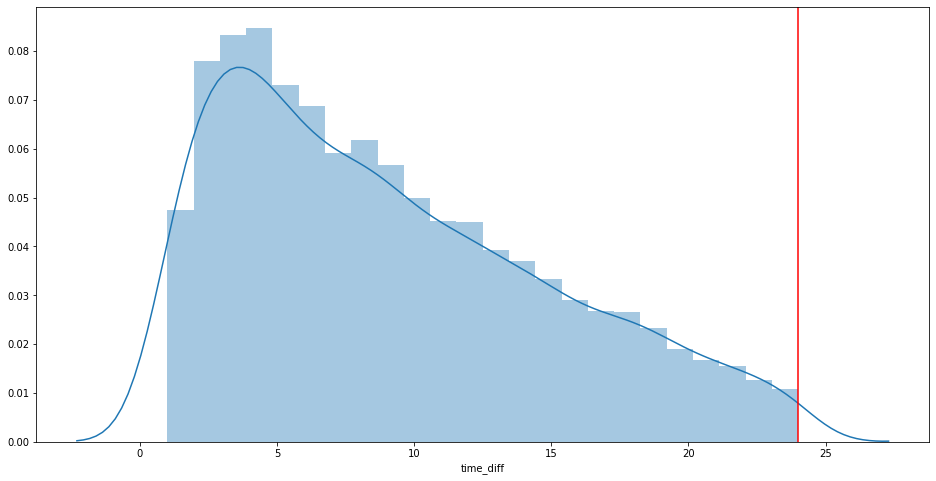

In [27]:
fig, ax = plt.subplots(figsize=(16,8))
sns.distplot(shorts['time_diff'])
# ax.set_xticks(np.arange(0, 110, 10))
ax.axvline(x=24, color='red')